In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for class imbalance

The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

* Job Category	Relative Frequency
* Data Science	0.281236
* Data Analytics	0.224231
* Other	0.214609
* Managerial	0.121300
* Machine Learning	0.083248
* Data Engineering	0.075375
Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.


* Print the relative frequency of the "Job_Category" column from salaries DataFrame.

In [3]:
salaries = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Selecting the job_title and salary columns and storing them in a new dataframe
new_salary = salaries[['job_title', 'salary']]
print(new_salary)

                      job_title  salary
0                Data Scientist   70000
1    Machine Learning Scientist  260000
2             Big Data Engineer   85000
3          Product Data Analyst   20000
4     Machine Learning Engineer  150000
..                          ...     ...
602               Data Engineer  154000
603               Data Engineer  126000
604                Data Analyst  129000
605                Data Analyst  150000
606                AI Scientist  200000

[607 rows x 2 columns]


In [7]:
# Print the relative frequency of Job_Category
print(salaries["job_title"].value_counts(normalize = True))

job_title
Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager            

**Fantastic relative frequency calculation! It looks like Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial roles?**

**Cross-tabulation**

Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.


* Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".
* Cross-tabulate "Job_Category" and classes of "Company_Size" as column names.
* Update pd.crosstab() to return the mean "Salary_USD" values.

In [10]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["company_size"], salaries["experience_level"]))

experience_level  EN  EX  MI   SE
company_size                     
L                 29  11  86   72
M                 30  12  98  186
S                 29   3  29   22


In [11]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["job_title"], salaries["company_size"]))

company_size                               L   M   S
job_title                                           
3D Computer Vision Researcher              0   1   0
AI Scientist                               2   2   3
Analytics Engineer                         0   4   0
Applied Data Scientist                     5   0   0
Applied Machine Learning Scientist         2   2   0
BI Data Analyst                            2   2   2
Big Data Architect                         0   1   0
Big Data Engineer                          4   2   2
Business Data Analyst                      4   1   0
Cloud Data Engineer                        1   0   1
Computer Vision Engineer                   0   4   2
Computer Vision Software Engineer          0   1   2
Data Analyst                              13  76   8
Data Analytics Engineer                    2   2   0
Data Analytics Lead                        1   0   0
Data Analytics Manager                     2   5   0
Data Architect                             3  

In [12]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["job_title"], salaries["company_size"],
            values=salaries["salary_in_usd"], aggfunc="mean"))

company_size                                          L              M  \
job_title                                                                
3D Computer Vision Researcher                       NaN    5409.000000   
AI Scientist                              127500.000000   66000.000000   
Analytics Engineer                                  NaN  175000.000000   
Applied Data Scientist                    175655.000000            NaN   
Applied Machine Learning Scientist        249000.000000   35137.500000   
BI Data Analyst                            93129.500000   99000.000000   
Big Data Architect                                  NaN   99703.000000   
Big Data Engineer                          28680.250000   84512.000000   
Business Data Analyst                      91253.500000   18442.000000   
Cloud Data Engineer                        89294.000000            NaN   
Computer Vision Engineer                            NaN   44476.750000   
Computer Vision Software Engineer     

Awesome cross-tabulation! This is a handy function to examine the combination of frequencies, as well as find aggregated statistics. Looks like the largest mean salary is for Managerial data roles in large companies!

# Extracting features for correlation

In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.


* Extract the month from "date_of_response", storing it as a column called "month".
* Create the "weekday" column, containing the weekday that the participants completed the survey.
* Plot a heat map, including the Pearson correlation coefficient scores.

In [13]:
salaries.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [ ]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

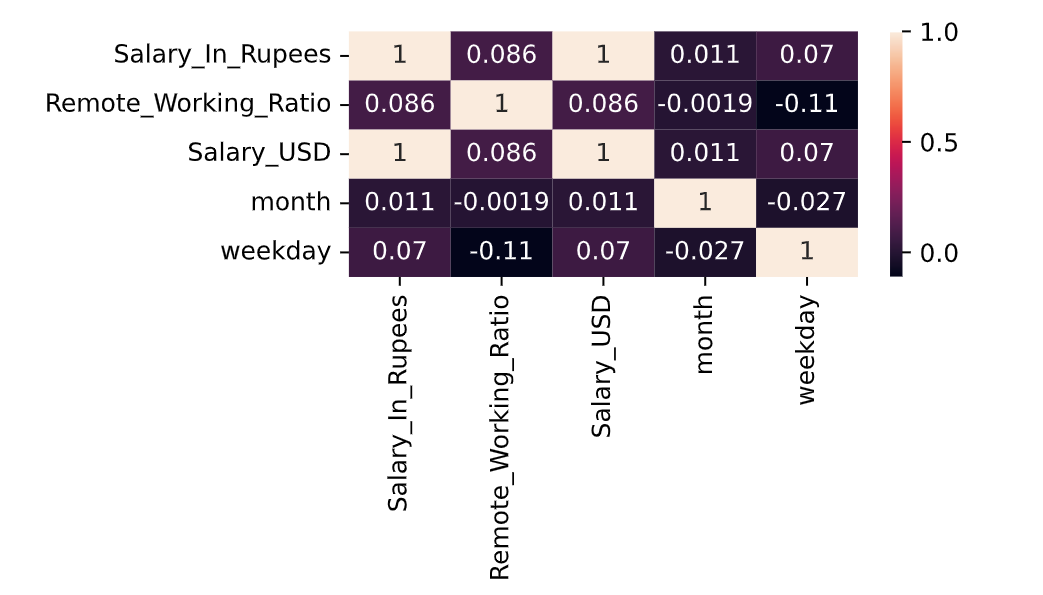

 Looks like there aren't any meaningful relationships between our numeric variables, so let's see if converting numeric data into classes offers additional insights

# **Calculating salary percentiles**

In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

\
* Find the 25th percentile of "Salary_USD".
* Store the median of "Salary_USD" as salaries_median.
* Get the 75th percentile of salaries.

In [15]:
# Find the 25th percentile
twenty_fifth = salaries["salary_in_usd"].quantile(0.25)

# Save the median
salaries_median = salaries["salary_in_usd"].median()

# Gather the 75th percentile
seventy_fifth = salaries["salary_in_usd"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

62726.0 101570.0 150000.0


Looks like the interquartile range is between 62726.0 and 150000.0 dollars! Now let's use these variables to add a categorical salary column into the DataFrame!

# Categorizing salaries

Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.


* Create salary_labels, a list containing "entry", "mid", "senior", and "exec".
* Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD".
* split "Salary_USD" based on the labels and ranges you've created.
* Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels.




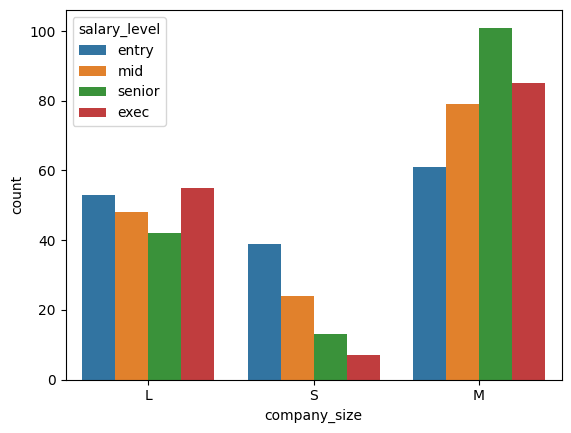

In [16]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["salary_in_usd"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["salary_in_usd"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="company_size", hue="salary_level")
plt.show()

Nice work! By using pd.cut() to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary. Now let's look at generating hypotheses as you reach the end of the EDA phase!

# **Comparing salaries**

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.


* Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
* Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location".





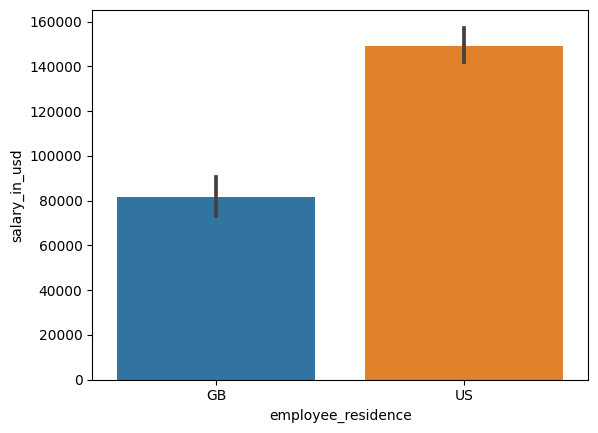

In [17]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["employee_residence"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="employee_residence", y="salary_in_usd")
plt.show()

**Nicely done! By subsetting the data you were able to directly compare salaries between the USA and Great Britain. The visualization suggests you've generated a hypothesis that is worth formally investigating to determine whether a real difference exists or not!**

**Choosing a hypothesis**

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

* Value	Meaning
* CT	Contractor
* FL	Freelance
* PT	Part-time
* FT	Full-time

* Produce a barplot comparing "Salary_USD" by "Company_Size", factoring "Employment_Status".

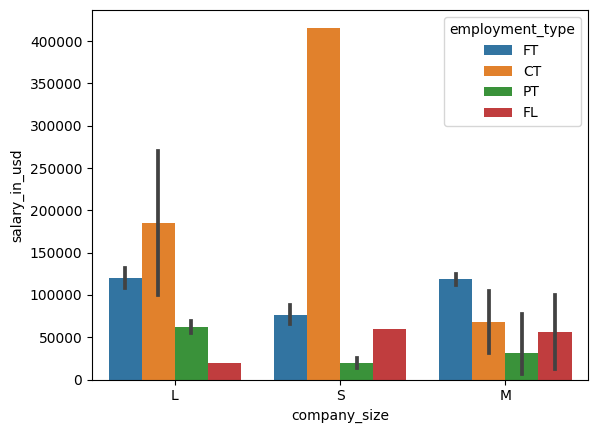

In [18]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="company_size", y="salary_in_usd", hue="employment_type")
plt.show()

On average, small companies pay contractors more than medium-sized companies.

Excellent! Contractors appear to be paid more by large companies on average based on the data, so this is a reasonable hypothesis! Let's recap what you've learned in the course!